In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df_games = pd.read_csv('/home/jupyter-l.fedoseeva-12/Mat_stats/Lesson_1/games.csv')

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [46]:
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [47]:
df_games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [48]:
df_games = df_games.dropna()

In [49]:
df_games.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Проверим, какие переменные являются количественными, а какие категориальными. Соотнесите названия переменных с соответствующим типом данных.

In [50]:
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [51]:
df_games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [52]:
df_games.Year = df_games.Year.astype('int')

In [53]:
df_games.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [55]:
df_games.Year.value_counts().head()

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
Name: Year, dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


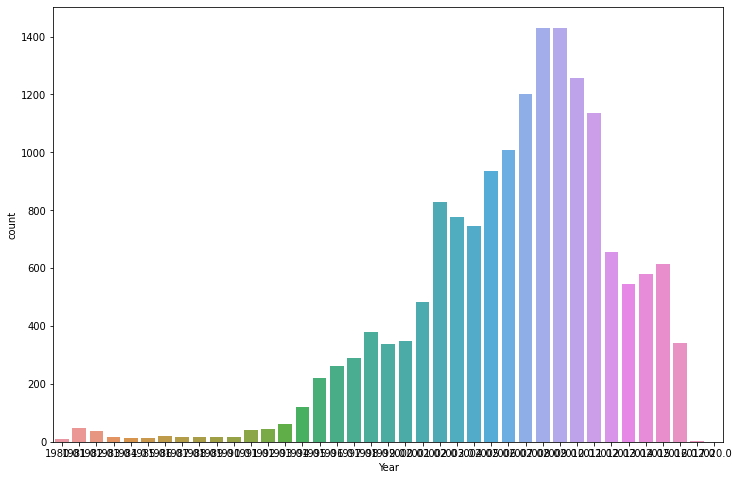

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot(df_games.Year)

In [56]:
df_games.query("Year > 2007").shape[0]/df_games.shape[0]

0.4906390031305629

На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания через запятую с пробелом. Пример: 

In [70]:
df_platform = df_games.Platform.value_counts(normalize=True)*100

In [157]:
df_platform[df_platform > 7].sort_values(ascending=False)

DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
Name: Platform, dtype: float64

Игры каких издателей (Publisher) встречаются в датасете чаще всего?
В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [83]:
df_publ = df_games.Publisher.value_counts(normalize=False)

In [84]:
df_publ

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Maximum Family Games               1
Warashi                            1
Visco                              1
Wargaming.net                      1
Number None                        1
Name: Publisher, Length: 576, dtype: int64

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 
В каком регионе медианное значение объема продаж является наибольшим?

In [125]:
df_games_nin = df_games.query('Publisher == "Nintendo"')

In [126]:
df_games_nin

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [97]:
df_games_nin.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,703.000000,703,703,696.00000,703,703,703.000000,703.000000,703.000000,703.000000,703.000000
unique,NaN,667,10,NaN,12,1,NaN,NaN,NaN,NaN,NaN
top,NaN,Donkey Kong Country,DS,NaN,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,151,NaN,112,703,NaN,NaN,NaN,NaN,NaN
mean,3860.830725,NaN,NaN,2003.83046,NaN,NaN,1.161977,0.595647,0.647824,0.135605,2.541337
std,4031.385208,NaN,NaN,7.77637,NaN,NaN,2.976782,1.736095,1.059476,0.462002,5.653126
min,1.000000,NaN,NaN,1983.00000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,719.000000,NaN,NaN,2000.00000,NaN,NaN,0.005000,0.000000,0.090000,0.000000,0.290000
50%,2335.000000,NaN,NaN,2005.00000,NaN,NaN,0.370000,0.120000,0.280000,0.030000,0.890000
75%,6009.500000,NaN,NaN,2009.00000,NaN,NaN,0.960000,0.480000,0.730000,0.090000,2.250000


Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

по оси x будет расположен жанр игры (Genre)
по оси у – объем продаж в Японии (JP_sales)
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

In [122]:
df_games_nin_g_JP = df_games_nin[['Genre', 'JP_Sales']]

In [123]:
df_games_nin_g_JP

,Genre,JP_Sales
0,Sports,3.77
1,Platform,6.81
2,Racing,3.79
3,Sports,3.28
4,Role-Playing,10.22
...,...,...
16269,Action,0.01
16357,Puzzle,0.01
16456,Misc,0.01
16473,Adventure,0.01


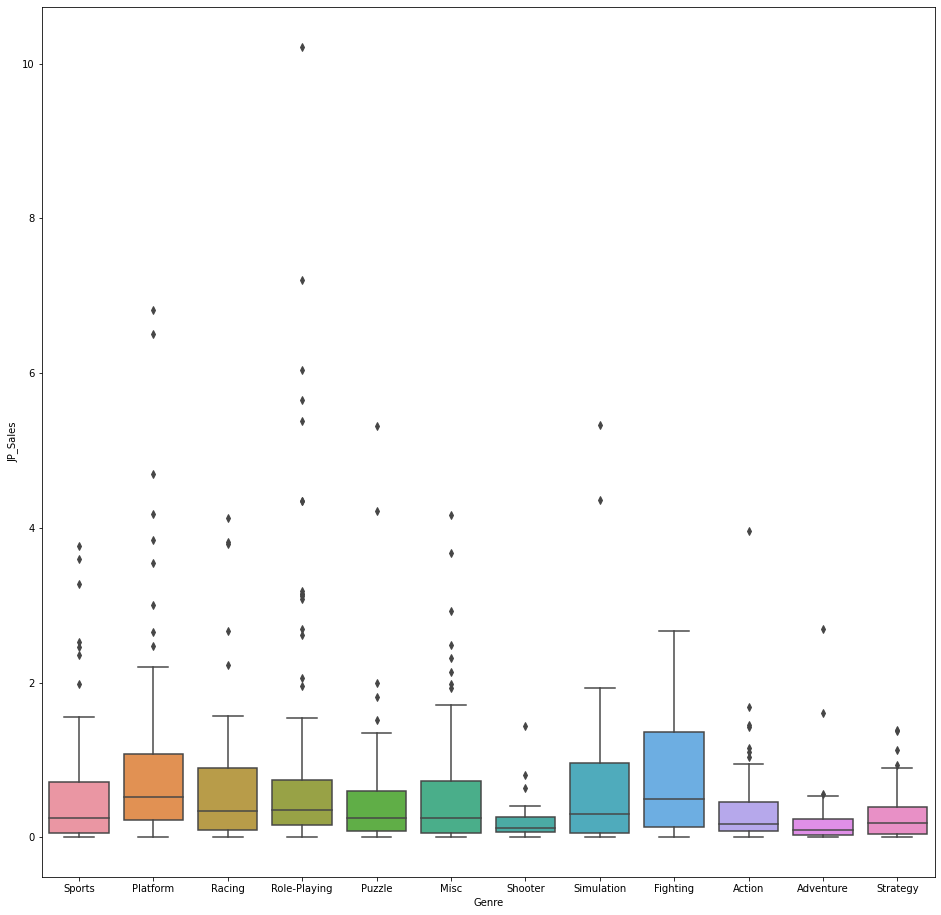

In [124]:
plt.figure(figsize=(16,16))
sns.boxplot(data=df_games_nin_g_JP, x='Genre', y='JP_Sales')

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.
На каком отрезке времени произошло резкое увеличение продаж игр жанра Sports? Иными словами, выберите отрезок, который включает в себя несколько крупных пиков.

In [127]:
df_games_nin

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [148]:
df_all_sum = df_games_nin.query('Genre == ["Fighting", "Simulation", "Platform", "Racing", "Sports"]') \
            .groupby(['Genre', 'Year']) \
            .agg({'Global_Sales': 'sum'})

In [149]:
df_all_sum

Global_Sales
Genre    Year                
Fighting 1987.0          5.42
         1993.0          2.00
         1995.0          3.20
         1996.0          0.99
         1999.0          5.55
...                       ...
Sports   2010.0          2.18
         2012.0          1.05
         2013.0          1.69
         2014.0          0.88
         2015.0          0.45

[114 rows x 1 columns]

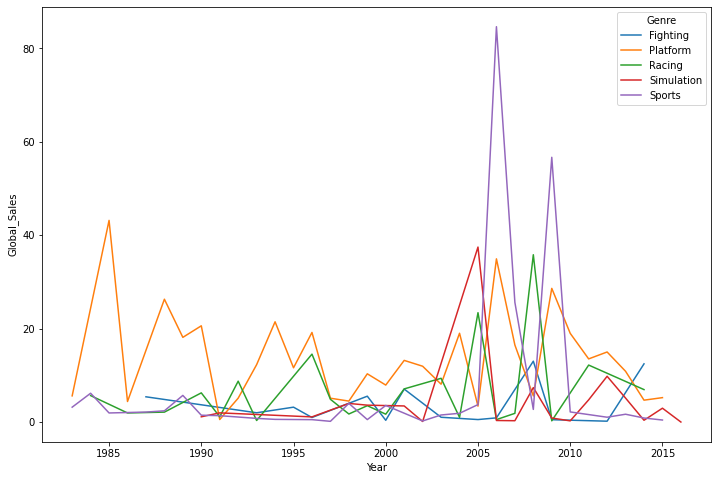

In [152]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data=df_all_sum)